### Importación de datos



In [94]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [95]:
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Producto                2359 non-null   object 
 1   Categoría del Producto  2359 non-null   object 
 2   Precio                  2359 non-null   float64
 3   Costo de envío          2359 non-null   float64
 4   Fecha de Compra         2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Lugar de Compra         2359 non-null   object 
 7   Calificación            2359 non-null   int64  
 8   Método de pago          2359 non-null   object 
 9   Cantidad de cuotas      2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 221.3+ KB


### Ingresos Totales por cada Tienda

In [96]:
ingreso1 = pd.to_numeric(tienda["Precio"], errors='coerce').sum() # pd.to_numeric() convierte automáticamente la columna 'Precio' a números:
ingreso2 = pd.to_numeric(tienda2["Precio"], errors='coerce').sum() # errors='coerce' convierte cualquier valor no convertible a NaN (que se ignora en la suma).
ingreso3 = pd.to_numeric(tienda3["Precio"], errors='coerce').sum()
ingreso4 = pd.to_numeric(tienda4["Precio"], errors='coerce').sum()

print(f'Ingreso total de la Tienda 1: ${ingreso1:,.2f}')
print(f'Ingreso total de la Tienda 2: ${ingreso2:,.2f}')
print(f'Ingreso total de la Tienda 3: ${ingreso3:,.2f}')
print(f'Ingreso total de la Tienda 4: ${ingreso4:,.2f}\n')

ingresos_totales_tiendas = ingreso1 + ingreso2 + ingreso3 + ingreso4
print(f'Ingresos totales de las 4 tiendas: ${ingresos_totales_tiendas:,.2f}')

Ingreso total de la Tienda 1: $1,150,880,400.00
Ingreso total de la Tienda 2: $1,116,343,500.00
Ingreso total de la Tienda 3: $1,098,019,600.00
Ingreso total de la Tienda 4: $1,038,375,700.00

Ingresos totales de las 4 tiendas: $4,403,619,200.00


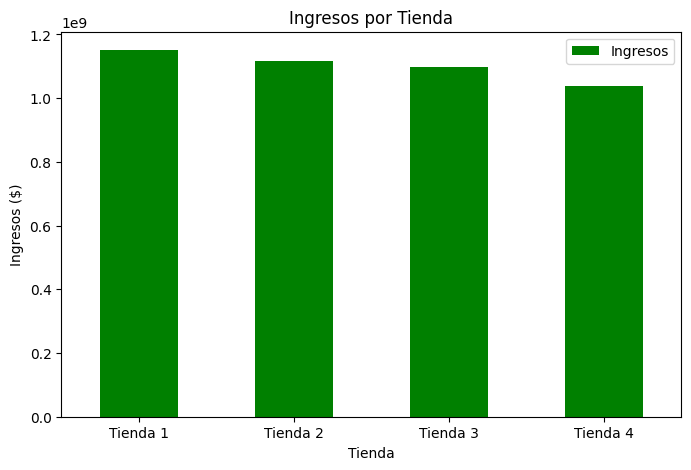

In [97]:
grafico_ingresos_tiendas = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Ingresos': [ingreso1, ingreso2, ingreso3, ingreso4]})
grafico_ingresos_tiendas.plot(kind='bar', figsize=(8,5), color='green', x='Tienda', y='Ingresos', legend=True)
plt.title('Ingresos por Tienda')
plt.ylabel('Ingresos ($)')
plt.xlabel('Tienda')
plt.xticks(rotation=0)
plt.show()

# 2. Ventas por categoría

Descripción

En este debes calcular la cantidad de productos vendidos por categoría en cada tienda. La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [98]:
tienda.head(3)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444


In [99]:
ventas_por_categoria = tienda.groupby("Categoría del Producto")["Categoría del Producto"].value_counts()\
                             .reset_index(name='Cantidad de Ventas')\
                             .sort_values(by='Cantidad de Ventas', ascending=False)

ventas_por_categoria2 = tienda2.groupby("Categoría del Producto")["Categoría del Producto"].value_counts()\
                               .reset_index(name='Cantidad de Ventas')\
                               .sort_values(by='Cantidad de Ventas', ascending=False)
 
ventas_por_categoria3 = tienda3.groupby("Categoría del Producto")["Categoría del Producto"].value_counts()\
                               .reset_index(name='Cantidad de Ventas')\
                               .sort_values(by='Cantidad de Ventas', ascending=False)  
                               
ventas_por_categoria4 = tienda4.groupby("Categoría del Producto")["Categoría del Producto"].value_counts()\
                               .reset_index(name='Cantidad de Ventas')\
                               .sort_values(by='Cantidad de Ventas', ascending=False)
                               
print("=== TOP VENTAS POR CATEGORÍA - TIENDA 1 ===")
print(ventas_por_categoria.head())

print("\n=== TOP VENTAS POR CATEGORÍA - TIENDA 2 ===")
print(ventas_por_categoria2.head())

print("\n=== TOP VENTAS POR CATEGORÍA - TIENDA 3 ===")
print(ventas_por_categoria3.head())

print("\n=== TOP VENTAS POR CATEGORÍA - TIENDA 4 ===")
print(ventas_por_categoria4.head())

                          



=== TOP VENTAS POR CATEGORÍA - TIENDA 1 ===
  Categoría del Producto  Cantidad de Ventas
7                Muebles                 465
3           Electrónicos                 448
5               Juguetes                 324
2      Electrodomésticos                 312
1   Deportes y diversión                 284

=== TOP VENTAS POR CATEGORÍA - TIENDA 2 ===
  Categoría del Producto  Cantidad de Ventas
7                Muebles                 442
3           Electrónicos                 422
5               Juguetes                 313
2      Electrodomésticos                 305
1   Deportes y diversión                 275

=== TOP VENTAS POR CATEGORÍA - TIENDA 3 ===
  Categoría del Producto  Cantidad de Ventas
7                Muebles                 499
3           Electrónicos                 451
5               Juguetes                 315
2      Electrodomésticos                 278
1   Deportes y diversión                 277

=== TOP VENTAS POR CATEGORÍA - TIENDA 4 ===
  Categoría

In [110]:
tiendas_datos = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

# Diccionario para almacenar resultados
resultados = {}

for nombre, df in tiendas_datos.items():
    # Usar value_counts directamente (más eficiente)
    ventas = df['Categoría del Producto'].value_counts().reset_index()
    ventas.columns = ['Categoría del Producto', 'Cantidad de Ventas']
    ventas = ventas.sort_values('Cantidad de Ventas', ascending=False)
    resultados[nombre] = ventas

# Mostrar tablas
print("=== VENTAS POR CATEGORÍA EN CADA TIENDA ===\n")
for nombre, df_ventas in resultados.items():
    print(f"\n{nombre}:")
    print(df_ventas.to_string(index=False))
    

=== VENTAS POR CATEGORÍA EN CADA TIENDA ===


Tienda 1:
 Categoría del Producto  Cantidad de Ventas
                Muebles                 465
           Electrónicos                 448
               Juguetes                 324
      Electrodomésticos                 312
   Deportes y diversión                 284
 Instrumentos musicales                 182
                 Libros                 173
Artículos para el hogar                 171

Tienda 2:
 Categoría del Producto  Cantidad de Ventas
                Muebles                 442
           Electrónicos                 422
               Juguetes                 313
      Electrodomésticos                 305
   Deportes y diversión                 275
 Instrumentos musicales                 224
                 Libros                 197
Artículos para el hogar                 181

Tienda 3:
 Categoría del Producto  Cantidad de Ventas
                Muebles                 499
           Electrónicos                 45

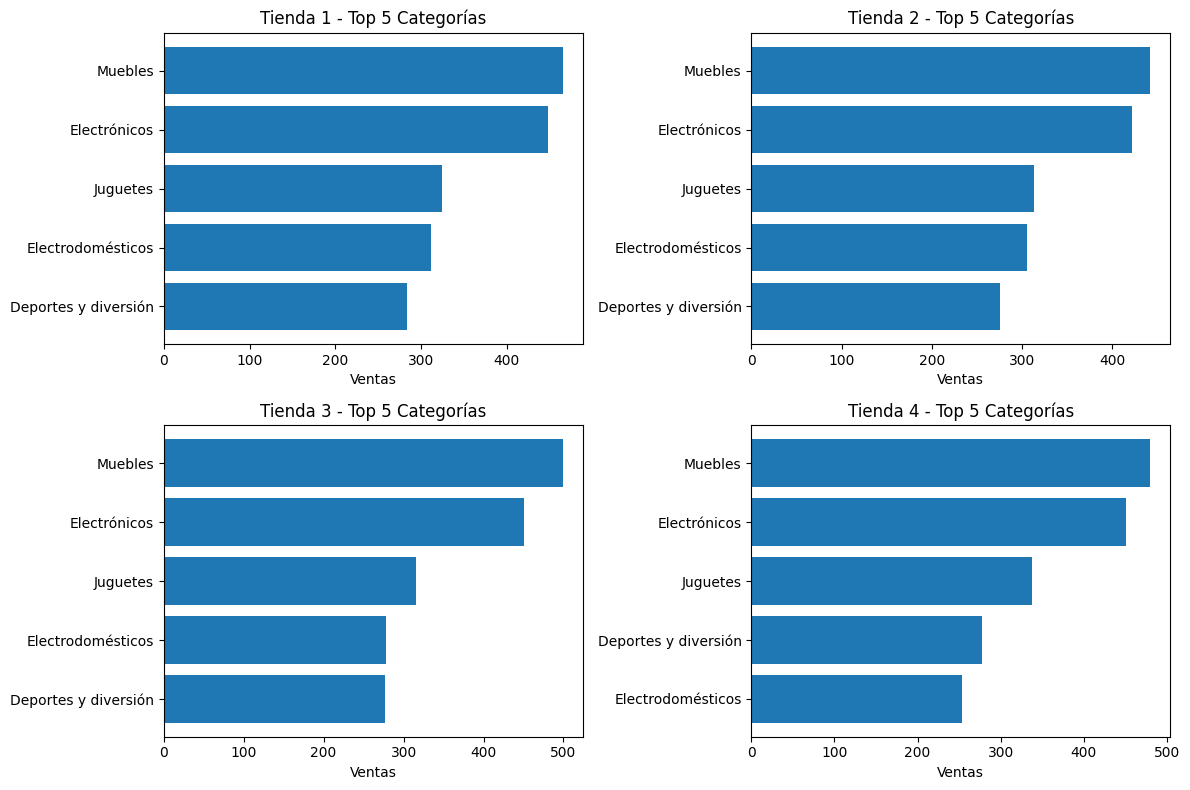

In [109]:
# Visualización 1: Barras horizontales
plt.figure(figsize=(12, 8))

for idx, (nombre, df_ventas) in enumerate(resultados.items(), 1):
    plt.subplot(2, 2, idx)
    
    # Tomar las 5 categorías principales
    top_5 = df_ventas.head(5)
    
    plt.barh(top_5['Categoría del Producto'], top_5['Cantidad de Ventas'])
    plt.title(f'{nombre} - Top 5 Categorías')
    plt.xlabel('Ventas')
    
    # Invertir eje Y para que la mayor esté arriba
    plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


Descripción

En este paso, debes calcular las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [101]:
tienda.head(3)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444


In [102]:
promedio1 = tienda['Calificación'].mean()
promedio2 = tienda2['Calificación'].mean()
promedio3 = tienda3['Calificación'].mean()
promedio4 = tienda4['Calificación'].mean()


print("=== CALIFICACIONES PROMEDIO POR TIENDA ===")
print(f"Tienda 1: {promedio1:.2f} estrellas")
print(f"Tienda 2: {promedio2:.2f} estrellas")
print(f"Tienda 3: {promedio3:.2f} estrellas")
print(f"Tienda 4: {promedio4:.2f} estrellas")



=== CALIFICACIONES PROMEDIO POR TIENDA ===
Tienda 1: 3.98 estrellas
Tienda 2: 4.04 estrellas
Tienda 3: 4.05 estrellas
Tienda 4: 4.00 estrellas


# 4. Productos más y menos vendidos

Descripción

En este paso, debes identificar qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualiza los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [103]:
tiendas = {
    'Tienda 1': pd.read_csv(url),
    'Tienda 2': pd.read_csv(url2),
    'Tienda 3': pd.read_csv(url3),
    'Tienda 4': pd.read_csv(url4)
}

# Lista para almacenar resultados de todas las tiendas
resultados_todas_tiendas = []


for nombre_tienda, df in tiendas.items():
    # Primero, agregamos una columna con el nombre de la tienda para poder agrupar por ella
    df['Tienda'] = nombre_tienda
    
    # Contar ventas por producto en cada tienda
    ventas_por_producto = df.groupby(["Producto", "Tienda"]).size()\
                            .reset_index(name='Cantidad de Ventas')
    
    # Producto más vendido por tienda
    producto_mas_vendido = ventas_por_producto.loc[ventas_por_producto.groupby("Tienda")["Cantidad de Ventas"].idxmax()]\
                                              .rename(columns={"Producto": 'Producto Más Vendido', 
                                                               "Cantidad de Ventas": 'Ventas Máximas'})
    
    # Producto menos vendido por tienda
    producto_menos_vendido = ventas_por_producto.loc[ventas_por_producto.groupby("Tienda")["Cantidad de Ventas"].idxmin()]\
                                                .rename(columns={"Producto": 'Producto Menos Vendido', 
                                                                 "Cantidad de Ventas": 'Ventas Mínimas'})
    
    # Combinar resultados
    resultado_ventas = producto_mas_vendido.merge(
        producto_menos_vendido[["Tienda", "Producto Menos Vendido", "Ventas Mínimas"]], 
        on="Tienda"
    )
    
    resultados_todas_tiendas.append(resultado_ventas)

# Combinar todos los resultados en un solo DataFrame
resultado_final = pd.concat(resultados_todas_tiendas, ignore_index=True)


# Mostrar resultados
print("*** PRODUCTOS MÁS Y MENOS VENDIDOS POR TIENDA ***")
resultado_final[["Tienda", "Producto Más Vendido", "Ventas Máximas", 
                       "Producto Menos Vendido", "Ventas Mínimas"]]




*** PRODUCTOS MÁS Y MENOS VENDIDOS POR TIENDA ***


,Tienda,Producto Más Vendido,Ventas Máximas,Producto Menos Vendido,Ventas Mínimas
0,Tienda 1,Armario,60,Auriculares con micrófono,33
1,Tienda 2,Iniciando en programación,65,Juego de mesa,32
2,Tienda 3,Kit de bancas,57,Bloques de construcción,35
3,Tienda 4,Cama box,62,Guitarra eléctrica,33


In [104]:
def analizar_tienda(nombre, datos):
    conteo = datos['Producto'].value_counts()
    mas_vendido = conteo.idxmax() 
    menos_vendido = conteo.idxmin() 
    
    print(f"{nombre}:")
    print(f"Más vendido: {mas_vendido} ({conteo.max()} ventas)")
    print(f"Menos vendido: {menos_vendido} ({conteo.min()} ventas)")
    print()

# Analizar cada tienda
analizar_tienda("Tienda 1", tienda)
analizar_tienda("Tienda 2", tienda2)
analizar_tienda("Tienda 3", tienda3)
analizar_tienda("Tienda 4", tienda4)

Tienda 1:
Más vendido: Microondas (60 ventas)
Menos vendido: Auriculares con micrófono (33 ventas)

Tienda 2:
Más vendido: Iniciando en programación (65 ventas)
Menos vendido: Juego de mesa (32 ventas)

Tienda 3:
Más vendido: Kit de bancas (57 ventas)
Menos vendido: Bloques de construcción (35 ventas)

Tienda 4:
Más vendido: Cama box (62 ventas)
Menos vendido: Guitarra eléctrica (33 ventas)



# 5. Envío promedio por tienda

Descripción

En este paso, debes calcular el costo de envío promedio para cada tienda. El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.  Sabiendo que el cliente paga el envío.

In [105]:
tienda.head(3)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444


In [106]:
envios_promedio1 = tienda["Costo de envío"].mean()
envios_promedio2 = tienda2["Costo de envío"].mean()
envios_promedio3 = tienda3["Costo de envío"].mean()
envios_promedio4 = tienda4["Costo de envío"].mean()

print("=== COSTO DE ENVÍO PROMEDIO POR TIENDA ===")
print(f"Tienda 1: ${envios_promedio1:.2f}") 
print(f"Tienda 2: ${envios_promedio2:.2f}")
print(f"Tienda 3: ${envios_promedio3:.2f}") 
print(f"Tienda 4: ${envios_promedio4:.2f}")        


=== COSTO DE ENVÍO PROMEDIO POR TIENDA ===
Tienda 1: $26018.61
Tienda 2: $25216.24
Tienda 3: $24805.68
Tienda 4: $23459.46
